### Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Leitura de dados

In [2]:
test = pd.read_csv('data/desafio 2/conjunto_de_teste_1.csv')
train = pd.read_csv('data/desafio 2/conjunto_de_treinamento.csv')

test['origem'] = 'teste'
train['origem'] = 'treino'
# house pricing df
hp_df = pd.concat([test, train])

hp_df

,Id,tipo,bairro,tipo_vendedor,quartos,suites,vagas,area_util,area_extra,diferenciais,...,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar,origem,preco
0,0,Apartamento,Pina,Imobiliaria,4,4,3,182,0,copa e playground,...,0,1,0,0,0,0,0,0,teste,NaN
1,1,Apartamento,Tamarineira,Imobiliaria,2,0,1,85,0,nenhum,...,0,0,0,0,0,0,0,0,teste,NaN
2,2,Apartamento,Boa Viagem,Imobiliaria,3,1,2,115,20,piscina e churrasqueira,...,1,0,0,0,0,0,0,0,teste,NaN
3,3,Apartamento,Iputinga,Imobiliaria,3,0,1,92,0,nenhum,...,0,0,0,0,0,0,0,0,teste,NaN
4,4,Apartamento,Engenho do Meio,Imobiliaria,3,1,1,65,0,piscina e copa,...,1,0,0,0,0,0,0,0,teste,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,6678,Apartamento,Boa Viagem,Imobiliaria,4,4,3,170,0,piscina e churrasqueira,...,1,0,0,0,0,0,0,0,treino,1200000.0
4679,6679,Apartamento,Setubal,Imobiliaria,2,0,1,82,0,churrasqueira,...,0,0,0,0,0,0,0,0,treino,258000.0
4680,6680,Apartamento,Torre,Imobiliaria,3,1,1,75,0,nenhum,...,0,0,0,0,0,0,0,0,treino,252000.0
4681,6681,Apartamento,Casa Amarela,Imobiliaria,3,2,3,136,0,piscina e copa,...,1,0,0,0,0,0,0,0,treino,780000.0


#### Missing values

In [5]:
hp_df.isna().sum()

Id                   0
tipo                 0
bairro               0
tipo_vendedor        0
quartos              0
suites               0
vagas                0
area_util            0
area_extra           0
diferenciais         0
churrasqueira        0
estacionamento       0
piscina              0
playground           0
quadra               0
s_festas             0
s_jogos              0
s_ginastica          0
sauna                0
vista_mar            0
preco             2000
dtype: int64

#### Types

In [7]:
hp_df.dtypes

Id                  int64
tipo               object
bairro             object
tipo_vendedor      object
quartos             int64
suites              int64
vagas               int64
area_util           int64
area_extra          int64
diferenciais       object
churrasqueira       int64
estacionamento      int64
piscina             int64
playground          int64
quadra              int64
s_festas            int64
s_jogos             int64
s_ginastica         int64
sauna               int64
vista_mar           int64
origem             object
preco             float64
dtype: object

In [9]:
hp_df.select_dtypes(include=object)

,tipo,bairro,tipo_vendedor,diferenciais,origem
0,Apartamento,Pina,Imobiliaria,copa e playground,teste
1,Apartamento,Tamarineira,Imobiliaria,nenhum,teste
2,Apartamento,Boa Viagem,Imobiliaria,piscina e churrasqueira,teste
3,Apartamento,Iputinga,Imobiliaria,nenhum,teste
4,Apartamento,Engenho do Meio,Imobiliaria,piscina e copa,teste
...,...,...,...,...,...
4678,Apartamento,Boa Viagem,Imobiliaria,piscina e churrasqueira,treino
4679,Apartamento,Setubal,Imobiliaria,churrasqueira,treino
4680,Apartamento,Torre,Imobiliaria,nenhum,treino
4681,Apartamento,Casa Amarela,Imobiliaria,piscina e copa,treino


#### Encoding

In [11]:
obj_cols = ['tipo', 'bairro', 'tipo_vendedor', 'diferenciais']

def encode_string_col(df, col):
    df[col] = df[col].astype('category').cat.codes
    
for col in obj_cols:
    encode_string_col(hp_df, col)
    

In [12]:
hp_df

,Id,tipo,bairro,tipo_vendedor,quartos,suites,vagas,area_util,area_extra,diferenciais,...,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar,origem,preco
0,0,0,48,0,4,4,3,182,0,24,...,0,1,0,0,0,0,0,0,teste,NaN
1,1,0,63,0,2,0,1,85,0,50,...,0,0,0,0,0,0,0,0,teste,NaN
2,2,0,10,0,3,1,2,115,20,54,...,1,0,0,0,0,0,0,0,teste,NaN
3,3,0,38,0,3,0,1,92,0,50,...,0,0,0,0,0,0,0,0,teste,NaN
4,4,0,26,0,3,1,1,65,0,55,...,1,0,0,0,0,0,0,0,teste,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,6678,0,10,0,4,4,3,170,0,54,...,1,0,0,0,0,0,0,0,treino,1200000.0
4679,6679,0,59,0,2,0,1,82,0,9,...,0,0,0,0,0,0,0,0,treino,258000.0
4680,6680,0,65,0,3,1,1,75,0,50,...,0,0,0,0,0,0,0,0,treino,252000.0
4681,6681,0,15,0,3,2,3,136,0,55,...,1,0,0,0,0,0,0,0,treino,780000.0


In [13]:
hp_df.to_csv('data/desafio 2/hp_from_eda.csv', index=False)

Id
6683
[   0    1    2 ... 6680 6681 6682]




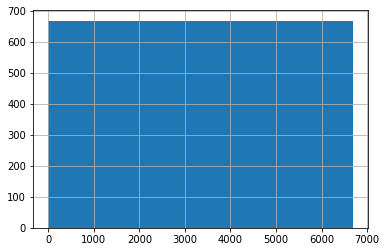

tipo
4
['Apartamento' 'Casa' 'Loft' 'Quitinete']




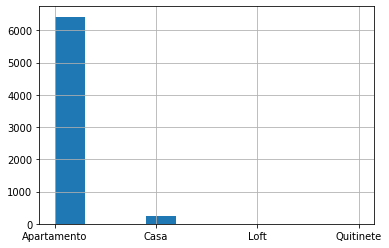

bairro
69
['Pina' 'Tamarineira' 'Boa Viagem' 'Iputinga' 'Engenho do Meio'
 'Rosarinho' 'Casa Forte' 'Cordeiro' 'Torre' 'Parnamirim' 'Gracas'
 'Poco da Panela' 'Aflitos' 'Espinheiro' 'Madalena' 'Imbiribeira'
 'Encruzilhada' 'Caxanga' 'Casa Amarela' 'Prado' 'Jd S Paulo' 'Jaqueira'
 'Boa Vista' 'San Martin' 'Campo Grande' 'Sto Amaro' 'Ibura' 'Setubal'
 'Varzea' 'Dois Irmaos' 'Derby' 'Ilha do Retiro' 'Apipucos' 'Monteiro'
 'Arruda' 'S Jose' 'Bongi' 'Cajueiro' 'Beberibe' 'Torreao'
 'Cid Universitaria' 'Agua Fria' 'Santana' 'Ipsep' 'Recife' 'Coelhos'
 'Afogados' 'Fundao' 'Guabiraba' 'Hipodromo' 'Sancho' 'Beira Rio'
 'Ilha do Leite' 'Piedade' 'Paissandu' 'Tejipio' 'Areias' 'Barro' 'Poco'
 'Macaxeira' 'Lagoa do Araca' 'Ponto de Parada' 'Estancia' 'Zumbi'
 'Benfica' 'Soledade' 'Centro' 'Sto Antonio' 'Cohab']




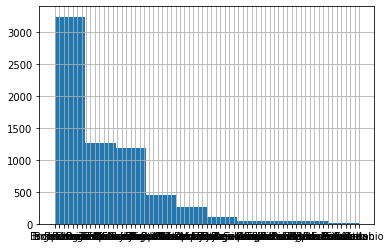

tipo_vendedor
2
['Imobiliaria' 'Pessoa Fisica']




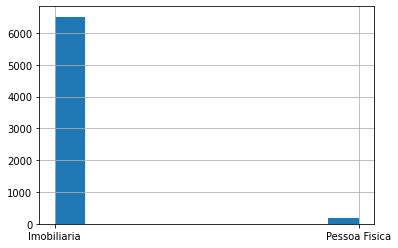

quartos
10
[ 4  2  3  5  1  6 10  9  7  8]




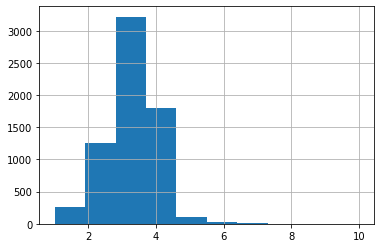

suites
7
[4 0 1 2 3 5 6]




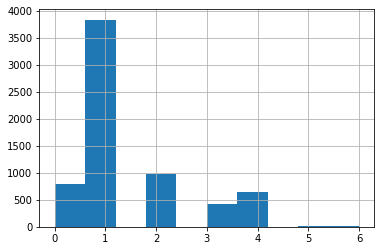

vagas
17
[ 3  1  2  0  4 30  5  6  7  8 10 12 20 18 17 13 15]




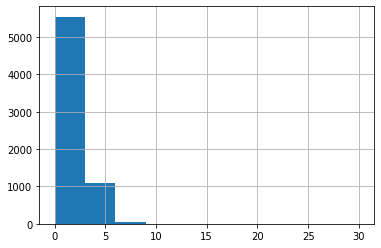

area_util
383
[ 182   85  115   92   65   62  107   97   50  250  131  151  149   70
  125  105   61   68   82  225  123   40   58   54   55   90   86  208
  185  215  150  220  170   77  300   67  330  206  203  240   30  600
   95   64   75   52  180  140  312  280   88  152  401   87  156   80
  324   45   60   72   94   59   69   57  207  374  128  132   47   25
  193  270  100  139  205   66  142  201  130   93  117   74   96  147
  450  120   53   35  187  161  520   98  800  160  370   81  108  110
  153  126  119  113  200  315   83   51  106   79  118  398  174  186
  264  135  276  260   71   36  307   48   84  247   44   63  230  164
  303  316  127  940 2735  116  144  176   89  103  168  143  145   38
  172  550  146  183  335  121  155  278  188   46  241  217  245  189
  257  175  181  173  104  129  157   39  255  109  169  236  400  148
  360  134  137  138  162   56  223   78  136  420  311   32   73  158
  210  320  249  436   99  239  232   91  163  569  298  191   

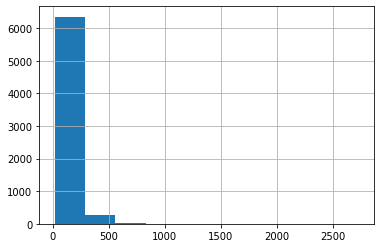

area_extra
200
[    0    20   200    55    10   119    95    30   130  1050    63    31
    14    37   280    34     9    28   139    49    82    25   430   136
 12060    87   100    47    22   177    15   750    69    29   220   110
    86   614    90   530    11    27   104    36    40     1     7   121
    67   151   160    74    80   103     6   193     4    32     5    72
    24    23    35    65   250    75   210   105  1210    21   440    12
  6022   134    78    42    53   147   337    38   239    16    77    19
    26   161   162   146    50   116    46    52    92   441   472   150
    33   143   203    18    81   202    17   118  2461    60     2  2810
   167   117    39   415    88   545    83    76    13    48   222   152
   112   135    43   232    57    99   126    51   231    58   140   144
    66   129     8   800    54    73   133    71   252    41   882    84
    68    62   500    56   360   125   478  1100   470   370  4173    70
   181   145   304    85   185   155

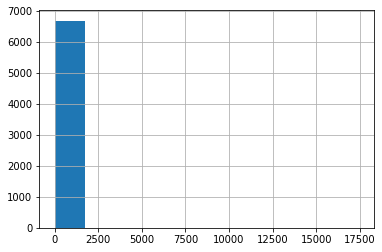

diferenciais
91
['copa e playground' 'nenhum' 'piscina e churrasqueira' 'piscina e copa'
 'piscina e playground' 'playground' 'copa e esquina' 'salao de festas'
 'estacionamento visitantes e playground' 'piscina e esquina'
 'playground e quadra poliesportiva' 'copa' 'piscina e sala de ginastica'
 'piscina e salao de festas' 'campo de futebol e playground'
 'piscina e sauna' 'frente para o mar e playground'
 'piscina e campo de futebol' 'churrasqueira e sauna'
 'playground e salao de festas' 'copa e estacionamento visitantes'
 'piscina' 'estacionamento visitantes' 'playground e sala de ginastica'
 'churrasqueira e salao de festas' 'frente para o mar e esquina'
 'piscina e estacionamento visitantes' 'churrasqueira'
 'quadra poliesportiva e salao de festas' 'copa e salao de festas'
 'churrasqueira e children care' 'churrasqueira e copa'
 'sauna e playground' 'sauna e quadra poliesportiva'
 'estacionamento visitantes e salao de jogos'
 'salao de festas e salao de jogos' 'frente para o mar 

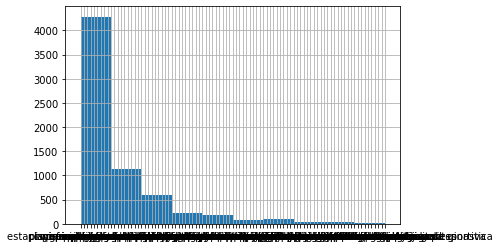

churrasqueira
2
[0 1]




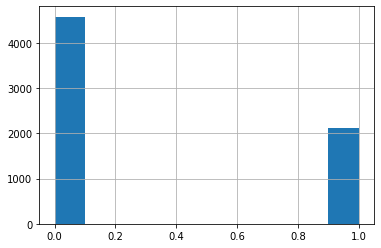

estacionamento
2
[0 1]




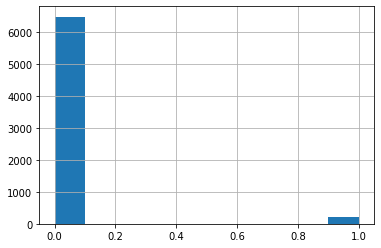

piscina
2
[0 1]




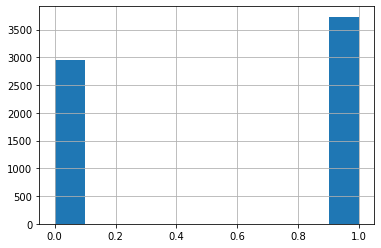

playground
2
[1 0]




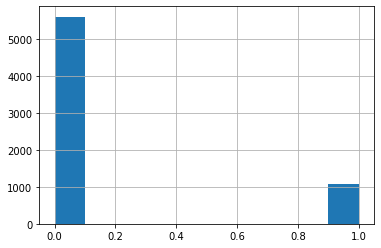

quadra
2
[0 1]




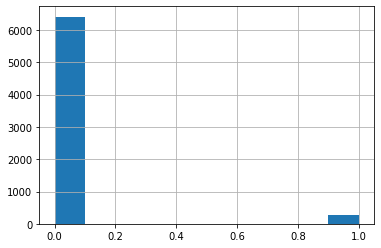

s_festas
2
[0 1]




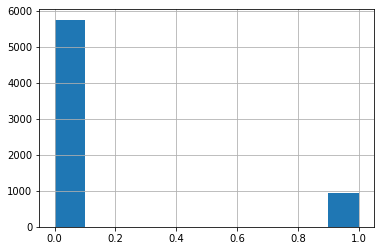

s_jogos
2
[0 1]




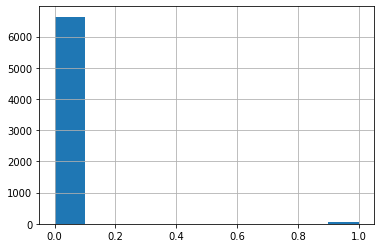

s_ginastica
2
[0 1]




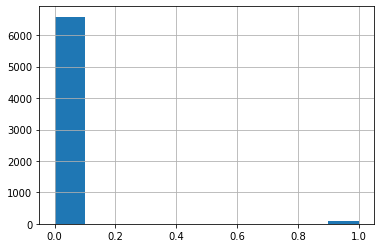

sauna
2
[0 1]




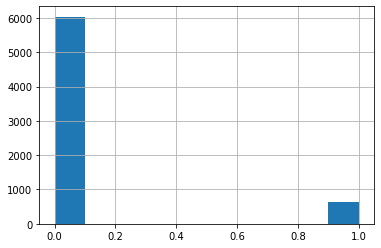

vista_mar
2
[0 1]




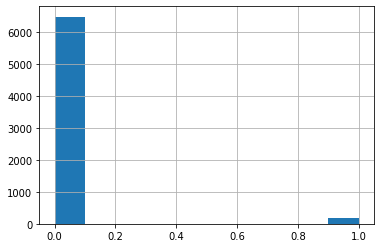

origem
2
['teste' 'treino']




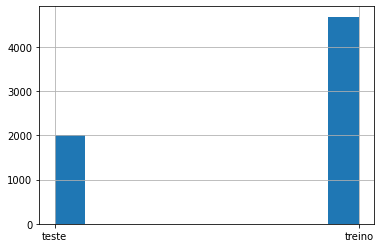

preco
679
[          nan 1.0000000e+06 6.8000000e+05 4.5000000e+05 1.0800000e+06
 3.5000000e+05 4.9000000e+05 3.9000000e+05 1.3500000e+06 4.0000000e+05
 9.8000000e+05 1.2000000e+06 2.1500000e+05 7.5000000e+05 5.8000000e+05
 1.5000000e+06 3.0000000e+05 4.2000000e+05 5.6000000e+05 4.8900000e+05
 1.3000000e+06 3.8000000e+05 6.9000000e+05 7.0000000e+05 2.2000000e+06
 3.7000000e+05 5.7900000e+05 2.6500000e+05 4.7000000e+05 9.0000000e+05
 8.1400000e+05 2.9850000e+05 1.1000000e+06 6.3500000e+05 1.6000000e+05
 4.8000000e+05 9.5000000e+05 4.4000000e+05 7.9000000e+05 8.6000000e+05
 4.6000000e+05 1.6900000e+05 1.6000000e+06 3.3000000e+05 5.3000000e+05
 4.3500000e+05 3.2000000e+05 1.7500000e+06 2.2000000e+05 2.0000000e+05
 3.1400000e+05 6.0700000e+05 2.2500000e+05 3.9500000e+05 1.4000000e+06
 5.5000000e+05 2.7000000e+05 1.0036800e+06 8.2000000e+05 1.7500000e+05
 5.2000000e+05 3.5000000e+06 2.4000000e+05 6.2000000e+05 8.5000000e+05
 2.4900000e+05 4.7400000e+05 3.0500000e+05 4.3000000e+05 6.5000000e

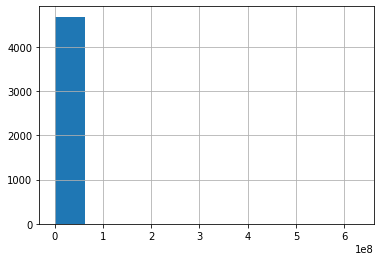

In [7]:
for col in hp_df.columns.tolist():
    print(col)
    print(hp_df[col].nunique())
    print(hp_df[col].unique())
    print('\n')
    hp_df[col].hist()
    plt.show()

In [9]:
test = hp_df[hp_df['preco'].notnull()]
test

,Id,tipo,bairro,tipo_vendedor,quartos,suites,vagas,area_util,area_extra,diferenciais,...,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar,origem,preco
0,2000,Casa,Imbiribeira,Imobiliaria,3,3,5,223,167,piscina e copa,...,1,0,0,0,0,0,0,0,treino,1000000.0
1,2001,Apartamento,Casa Amarela,Imobiliaria,4,4,2,157,0,piscina e churrasqueira,...,1,0,0,0,0,0,0,0,treino,680000.0
2,2002,Apartamento,Encruzilhada,Imobiliaria,3,1,0,53,0,nenhum,...,0,0,0,0,0,0,0,0,treino,450000.0
3,2003,Apartamento,Boa Viagem,Imobiliaria,4,3,2,149,0,piscina e churrasqueira,...,1,0,0,0,0,0,0,0,treino,1080000.0
4,2004,Apartamento,Rosarinho,Imobiliaria,2,1,1,54,0,piscina e churrasqueira,...,1,0,0,0,0,0,0,0,treino,350000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,6678,Apartamento,Boa Viagem,Imobiliaria,4,4,3,170,0,piscina e churrasqueira,...,1,0,0,0,0,0,0,0,treino,1200000.0
4679,6679,Apartamento,Setubal,Imobiliaria,2,0,1,82,0,churrasqueira,...,0,0,0,0,0,0,0,0,treino,258000.0
4680,6680,Apartamento,Torre,Imobiliaria,3,1,1,75,0,nenhum,...,0,0,0,0,0,0,0,0,treino,252000.0
4681,6681,Apartamento,Casa Amarela,Imobiliaria,3,2,3,136,0,piscina e copa,...,1,0,0,0,0,0,0,0,treino,780000.0


In [10]:
test['preco'].describe()

count    4.683000e+03
mean     9.277053e+05
std      1.050607e+07
min      7.500000e+02
25%      3.550000e+05
50%      5.150000e+05
75%      8.300000e+05
max      6.300000e+08
Name: preco, dtype: float64

In [25]:
test_analysis = test[test['preco'] < 1.300000e+06]

In [26]:
test_analysis.shape

(4162, 22)

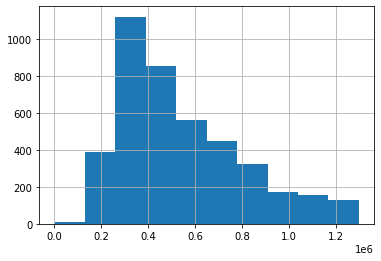

In [27]:
test_analysis['preco'].hist()
plt.show()

In [17]:
test_analysis['preco'].describe()

count      2879.000000
mean     393239.563088
std      115459.109831
min         750.000000
25%      310000.000000
50%      380000.000000
75%      480000.000000
max      625000.000000
Name: preco, dtype: float64

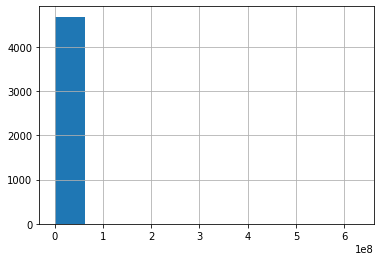

In [11]:
test['preco'].hist()
plt.show()

In [28]:
train = hp_df[hp_df['preco'].isna()]
train

,Id,tipo,bairro,tipo_vendedor,quartos,suites,vagas,area_util,area_extra,diferenciais,...,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar,origem,preco
0,0,Apartamento,Pina,Imobiliaria,4,4,3,182,0,copa e playground,...,0,1,0,0,0,0,0,0,teste,NaN
1,1,Apartamento,Tamarineira,Imobiliaria,2,0,1,85,0,nenhum,...,0,0,0,0,0,0,0,0,teste,NaN
2,2,Apartamento,Boa Viagem,Imobiliaria,3,1,2,115,20,piscina e churrasqueira,...,1,0,0,0,0,0,0,0,teste,NaN
3,3,Apartamento,Iputinga,Imobiliaria,3,0,1,92,0,nenhum,...,0,0,0,0,0,0,0,0,teste,NaN
4,4,Apartamento,Engenho do Meio,Imobiliaria,3,1,1,65,0,piscina e copa,...,1,0,0,0,0,0,0,0,teste,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Apartamento,Poco da Panela,Imobiliaria,2,1,2,100,0,nenhum,...,0,0,0,0,0,0,0,0,teste,NaN
1996,1996,Apartamento,Madalena,Imobiliaria,3,1,1,90,0,nenhum,...,0,0,0,0,0,0,0,0,teste,NaN
1997,1997,Apartamento,Boa Viagem,Imobiliaria,3,1,1,73,0,piscina e salao de festas,...,1,0,0,1,0,0,0,0,teste,NaN
1998,1998,Apartamento,Torre,Imobiliaria,4,3,2,112,2810,piscina e frente para o mar,...,1,0,0,0,0,0,0,1,teste,NaN


In [29]:
outliers = pd.concat([test_analysis, train])
outliers

,Id,tipo,bairro,tipo_vendedor,quartos,suites,vagas,area_util,area_extra,diferenciais,...,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar,origem,preco
0,2000,Casa,Imbiribeira,Imobiliaria,3,3,5,223,167,piscina e copa,...,1,0,0,0,0,0,0,0,treino,1000000.0
1,2001,Apartamento,Casa Amarela,Imobiliaria,4,4,2,157,0,piscina e churrasqueira,...,1,0,0,0,0,0,0,0,treino,680000.0
2,2002,Apartamento,Encruzilhada,Imobiliaria,3,1,0,53,0,nenhum,...,0,0,0,0,0,0,0,0,treino,450000.0
3,2003,Apartamento,Boa Viagem,Imobiliaria,4,3,2,149,0,piscina e churrasqueira,...,1,0,0,0,0,0,0,0,treino,1080000.0
4,2004,Apartamento,Rosarinho,Imobiliaria,2,1,1,54,0,piscina e churrasqueira,...,1,0,0,0,0,0,0,0,treino,350000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Apartamento,Poco da Panela,Imobiliaria,2,1,2,100,0,nenhum,...,0,0,0,0,0,0,0,0,teste,NaN
1996,1996,Apartamento,Madalena,Imobiliaria,3,1,1,90,0,nenhum,...,0,0,0,0,0,0,0,0,teste,NaN
1997,1997,Apartamento,Boa Viagem,Imobiliaria,3,1,1,73,0,piscina e salao de festas,...,1,0,0,1,0,0,0,0,teste,NaN
1998,1998,Apartamento,Torre,Imobiliaria,4,3,2,112,2810,piscina e frente para o mar,...,1,0,0,0,0,0,0,1,teste,NaN


In [33]:
obj_cols = ['tipo', 'bairro', 'tipo_vendedor', 'diferenciais']

def encode_string_col(df, col):
    df[col] = df[col].astype('category').cat.codes
    

In [34]:
for col in obj_cols:
    encode_string_col(outliers, col)


In [35]:
outliers

,Id,tipo,bairro,tipo_vendedor,quartos,suites,vagas,area_util,area_extra,diferenciais,...,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar,origem,preco
0,2000,1,36,0,3,3,5,223,167,55,...,1,0,0,0,0,0,0,0,treino,1000000.0
1,2001,0,15,0,4,4,2,157,0,54,...,1,0,0,0,0,0,0,0,treino,680000.0
2,2002,0,25,0,3,1,0,53,0,50,...,0,0,0,0,0,0,0,0,treino,450000.0
3,2003,0,10,0,4,3,2,149,0,54,...,1,0,0,0,0,0,0,0,treino,1080000.0
4,2004,0,54,0,2,1,1,54,0,54,...,1,0,0,0,0,0,0,0,treino,350000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,0,50,0,2,1,2,100,0,50,...,0,0,0,0,0,0,0,0,teste,NaN
1996,1996,0,43,0,3,1,1,90,0,50,...,0,0,0,0,0,0,0,0,teste,NaN
1997,1997,0,10,0,3,1,1,73,0,64,...,1,0,0,1,0,0,0,0,teste,NaN
1998,1998,0,65,0,4,3,2,112,2810,58,...,1,0,0,0,0,0,0,1,teste,NaN


In [36]:
outliers.to_csv('data/desafio 2/hp_from_eda_2.csv', index=False)